Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.



In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

import os
import sys
import pandas as pd
import numpy as np

Setting seed

In [0]:
np.random.seed(42)


Downloading the dataset

In [0]:
!wget https://data.broadinstitute.org/bbbc/BBBC038/stage1_train.zip -r -O train.zip; unzip train.zip; rm train.zip
!wget https://data.broadinstitute.org/bbbc/BBBC038/stage1_test.zip -r -O test.zip; unzip test.zip; rm test.zip
!rm sample_data -r
!rm .config -r

Dataset with one mask per cell

In [0]:
columns  = ['image','mask']

images = []
masks = []
for fold in os.listdir():
  path = Path('/content')/fold
  for subf in os.listdir(fold):
    if subf == 'images':
      if os.path.isdir(path/'masks'):
        path_img = [path/subf/fold] * len(os.listdir(path/'masks'))
        images.extend(path_img)
      '''else:
        path_img = path/subf/fold
        images.append(path_img)'''
    else:
      for mask in os.walk(path/subf):
        path_mask = mask[2]
        path_mask=[mask[0]+"/"+i.format(i) for i in path_mask]
        masks.extend(path_mask)

In [0]:
df = pd.DataFrame(list(zip(images,masks)),columns=columns)

In [0]:
df['image'] = df['image'].astype(str) + '.png'

In [9]:
df.head()

,image,mask
0,/content/4596961c789d3b41916492918797724fe7512...,/content/4596961c789d3b41916492918797724fe7512...
1,/content/4596961c789d3b41916492918797724fe7512...,/content/4596961c789d3b41916492918797724fe7512...
2,/content/4596961c789d3b41916492918797724fe7512...,/content/4596961c789d3b41916492918797724fe7512...
3,/content/4596961c789d3b41916492918797724fe7512...,/content/4596961c789d3b41916492918797724fe7512...
4,/content/4596961c789d3b41916492918797724fe7512...,/content/4596961c789d3b41916492918797724fe7512...


Merging the masks

In [0]:
root = Path('/content');
ds_folder = root/'ds'
ds_folder.mkdir(exist_ok=True)

In [11]:
ds_folder

PosixPath('/content/ds')

In [0]:
rel_masks = {}
for fold in os.listdir():
  path = Path('/content')/fold
  for subf in os.listdir(fold):
    if subf == 'images':
      if os.path.isdir(path/'masks'):
        rel_masks[path/subf/fold] = os.listdir(path/'masks')

In [0]:
import cv2
from shutil import copyfile
from scipy.misc import *

for image in rel_masks:
  path = Path(str(image)[:74])/'masks'
  count = 0
  for mask in rel_masks[image]:
    if count == 0:
      img_final = cv2.imread(str(Path(path)/mask),1)
      count+=1
    else:
      img = cv2.imread(str(Path(path)/mask),1)
      img_final = cv2.addWeighted(img,1,img_final,1,0)
  new_path = Path(str(ds_folder)+(str(image)[8:74]))
  new_path.mkdir(exist_ok=True)
  new_path_mask = Path(str(new_path)+'/masks')
  new_path_mask.mkdir(exist_ok = True)
  new_path_image = Path(str(new_path)+'/images')
  new_path_image.mkdir(exist_ok = True)
  #Saving the images
  copyfile(Path(str(image) +'.png'), Path(str(new_path_image)+str(image)[80:]+'.png'))
  #plt.matshow(img_final)
  #plt.savefig(Path(str(new_path_mask)+str(image)[80:]+'.png'))
  #plt.close(fig=img_final)
  #plt.imsave(Path(str(new_path_mask)+str(image)[80:]+'.png'),img_final, format = 'png')
  #Image.fromarray(img_final).save(Path(str(new_path_mask)+str(image)[80:]+'.png'))
  PIL.Image.fromarray(np.uint8(img_final)).save(Path(str(new_path_mask)+str(image)[80:]+'.png'))

Masks were saved on /content/ds{name of the image}/masks/{name of the image}
images were saved on /content/ds{name of the image}/images/{name of the image}

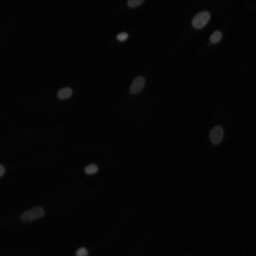

In [14]:
open_image('ds/e66f25e175abab08ecb4e5f6859db64a211e0ddffb262d7e727b9d9bd4aad2d2/images/e66f25e175abab08ecb4e5f6859db64a211e0ddffb262d7e727b9d9bd4aad2d2.png')

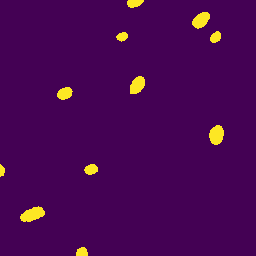

In [15]:
open_mask('ds/e66f25e175abab08ecb4e5f6859db64a211e0ddffb262d7e727b9d9bd4aad2d2/masks/e66f25e175abab08ecb4e5f6859db64a211e0ddffb262d7e727b9d9bd4aad2d2.png')

Putting the paths to the images and the masks in a Pandas dataframe

In [0]:
new_masks = []
new_images = []
for i in os.listdir('ds'):
  new_masks.append('ds/'+i+'/masks/'+i+'.png')
  new_images.append('ds/'+i+'/images/'+i+'.png')
new_df = pd.DataFrame(list(zip(new_images,new_masks)), columns=['image','mask'])

In [0]:
new_df['image'] = '/content/' + new_df['image'].astype(str)

In [0]:
new_df['image'] = list(map(Path,new_df['image']))

In [19]:
new_df['image'][0]

PosixPath('/content/ds/4596961c789d3b41916492918797724fe75128239fefc516c3ee75322b7926f0/images/4596961c789d3b41916492918797724fe75128239fefc516c3ee75322b7926f0.png')

In [0]:
new_df['mask'] = '/content/' + new_df['mask']

In [21]:
new_df.head()

,image,mask
0,/content/ds/4596961c789d3b41916492918797724fe7...,/content/ds/4596961c789d3b41916492918797724fe7...
1,/content/ds/b98681c74842c4058bd2f88b06063731c2...,/content/ds/b98681c74842c4058bd2f88b06063731c2...
2,/content/ds/2dd3356f2dcf470aec4003800744dfec64...,/content/ds/2dd3356f2dcf470aec4003800744dfec64...
3,/content/ds/514ccfc78cb55988a238d3ac9dc83460aa...,/content/ds/514ccfc78cb55988a238d3ac9dc83460aa...
4,/content/ds/ec486143ecfec847c22cd8cbc207d85312...,/content/ds/ec486143ecfec847c22cd8cbc207d85312...


In [0]:
mask_ok = Path("/content/ds/masks")
mask_ok.mkdir(exist_ok=True)

def transform_y(y):
  I = np.asarray(PIL.Image.open(y))/255.
  #Ix = np.stack((I,I,I), axis=-1)
  im = PIL.Image.fromarray(np.uint8(I))
  #print(str(mask_ok)+str(y.name))
  im.save(str(mask_ok)+"/"+str(y.name))
  return (str(mask_ok)+"/"+str(y.name))

In [0]:
list_masks = list(map(Path, new_df['mask']))

In [0]:
list_masks

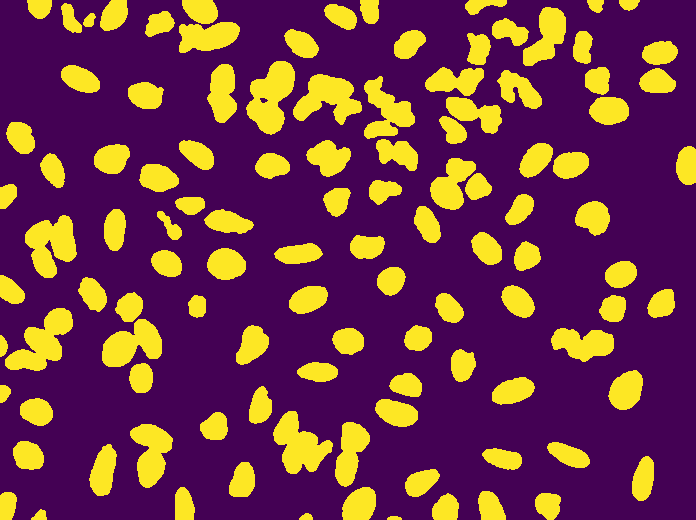

In [25]:
open_mask(list_masks[0])

In [26]:
from matplotlib.image import imread
image = imread(str(list_masks[0]))
image.shape

(520, 696, 3)

In [0]:
#teste= list(map(Path, df['mask']))

In [28]:
'''y = list_masks[0]
#y = teste[0]
I = np.asarray(PIL.Image.open(y))/255.
#Ix = np.stack((I,I,I), axis=-1)
im = PIL.Image.fromarray(np.uint8(I))
#print(str(mask_ok)+str(y.name))'''

'y = list_masks[0]\n#y = teste[0]\nI = np.asarray(PIL.Image.open(y))/255.\n#Ix = np.stack((I,I,I), axis=-1)\nim = PIL.Image.fromarray(np.uint8(I))\n#print(str(mask_ok)+str(y.name))'

In [0]:
#im.save("teste.png")

In [0]:
#open_mask('teste.png')

In [31]:
new_df['mask']

0      /content/ds/4596961c789d3b41916492918797724fe7...
1      /content/ds/b98681c74842c4058bd2f88b06063731c2...
2      /content/ds/2dd3356f2dcf470aec4003800744dfec64...
3      /content/ds/514ccfc78cb55988a238d3ac9dc83460aa...
4      /content/ds/ec486143ecfec847c22cd8cbc207d85312...
                             ...                        
665    /content/ds/ead9464a50a17f74bf1b6471d94ecce8d8...
666    /content/ds/319b6cb8b0d24b38db5e3c6fbb13b062e2...
667    /content/ds/6c85029f850d392791e13f74963391054f...
668    /content/ds/150b0ffa318c87b31d78af0e87d60390db...
669    /content/ds/4cbd6c37f3a55a538d759d440344c287ca...
Name: mask, Length: 670, dtype: object

In [0]:
#new_df = new_df.drop(list_masks.index(Path("/content/ds/masks/masks/masks.png")))

In [0]:
#list_masks.remove(Path("/content/ds/masks/masks/masks.png"))

In [0]:
list_masks = list(map(transform_y, list_masks))

Putting the transformed masks into the dataframe

In [0]:
new_df['path_masks'] = list_masks
new_df['path_masks'] = list(map(str,list_masks))

In [36]:
new_df["image"][1]

PosixPath('/content/ds/b98681c74842c4058bd2f88b06063731c26a90da083b1ef348e0ec734c58752b/images/b98681c74842c4058bd2f88b06063731c26a90da083b1ef348e0ec734c58752b.png')

In [0]:
codes = ['background', 'cell']

In [0]:
free = gpu_mem_get_free_no_cache()

choosing the batch size and using the datablock API

In [0]:
bs = 8
src = (SegmentationItemList.from_df(df=new_df, cols = 'image', path ='/').split_by_rand_pct(0.2).label_from_df(cols='path_masks', classes=codes)) 

In [0]:
data = (src.transform(get_transforms(), size=128, tfm_y=True)
           .databunch(bs=bs)
           .normalize(imagenet_stats))

In [41]:
data

ImageDataBunch;

Train: LabelList (536 items)
x: SegmentationItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: SegmentationLabelList
ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128)
Path: /;

Valid: LabelList (134 items)
x: SegmentationItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: SegmentationLabelList
ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128)
Path: /;

Test: None

In [0]:
wd = 1e-2

In [0]:
name2id = {v:k for k,v in enumerate(codes)}
background_code = name2id['background']

Creating a metric to evaluate the performance

In [0]:
'''def acc_camvid(input, target):
  target = target.squeeze(1)
  #input_new = torch.cat((target, target, target), 0)
  mask = target != background_code
  #return (input.argmax(dim=1)==target).float().mean()
  return (input.argmax(dim=1)[mask]==target[mask]).float().mean()
'''
def acc_camvid(input, target):
  target = target.squeeze(1)
#  input_new = torch.cat((target, target, target), 0)
  return (input.argmax(dim=1)==target).float().mean()

In [0]:
#torch.cuda.empty_cache()

Create a learner

In [46]:
learn = unet_learner(data, models.resnet50,metrics=acc_camvid, wd=wd,)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 51.4MB/s]


Choosing learning rate

In [47]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 9.12E-07
Min loss divided by 10: 3.98E-05


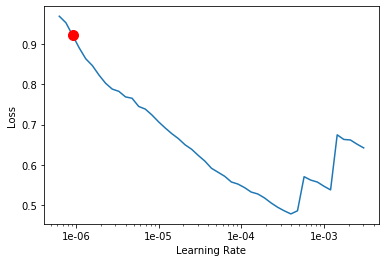

In [48]:
learn.recorder.plot(suggestion = True)

In [51]:
learn.fit_one_cycle(5, 3.98e-04)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.134309,0.102278,0.960907,01:53
1,0.104604,0.113261,0.956625,01:52
2,0.086955,0.072465,0.971575,01:52
3,0.074326,0.069954,0.972728,01:52
4,0.067265,0.069801,0.973025,01:52


In [0]:
learn.save('learn1')
#learn.load('learn1')

In [53]:
#learn.fit_one_cycle(1,2e-05)

SyntaxError: ignored

In [0]:
learn.show_results(rows=3, figsize=(10,15))

In [0]:
#learn.unfreeze()

In [0]:
#learn.fit_one_cycle(6,2e-05/10)

In [0]:
#learn.save('/content/unfreezed')

In [0]:
#from google.colab import files
#files.download('unfreezed.pth')

#Assign the number of cells

In [54]:
df.head()

,image,mask
0,/content/4596961c789d3b41916492918797724fe7512...,/content/4596961c789d3b41916492918797724fe7512...
1,/content/4596961c789d3b41916492918797724fe7512...,/content/4596961c789d3b41916492918797724fe7512...
2,/content/4596961c789d3b41916492918797724fe7512...,/content/4596961c789d3b41916492918797724fe7512...
3,/content/4596961c789d3b41916492918797724fe7512...,/content/4596961c789d3b41916492918797724fe7512...
4,/content/4596961c789d3b41916492918797724fe7512...,/content/4596961c789d3b41916492918797724fe7512...


In [55]:
new_df.tail()

,image,mask,path_masks
665,/content/ds/ead9464a50a17f74bf1b6471d94ecce8d8...,/content/ds/ead9464a50a17f74bf1b6471d94ecce8d8...,/content/ds/masks/ead9464a50a17f74bf1b6471d94e...
666,/content/ds/319b6cb8b0d24b38db5e3c6fbb13b062e2...,/content/ds/319b6cb8b0d24b38db5e3c6fbb13b062e2...,/content/ds/masks/319b6cb8b0d24b38db5e3c6fbb13...
667,/content/ds/6c85029f850d392791e13f74963391054f...,/content/ds/6c85029f850d392791e13f74963391054f...,/content/ds/masks/6c85029f850d392791e13f749633...
668,/content/ds/150b0ffa318c87b31d78af0e87d60390db...,/content/ds/150b0ffa318c87b31d78af0e87d60390db...,/content/ds/masks/150b0ffa318c87b31d78af0e87d6...
669,/content/ds/4cbd6c37f3a55a538d759d440344c287ca...,/content/ds/4cbd6c37f3a55a538d759d440344c287ca...,/content/ds/masks/4cbd6c37f3a55a538d759d440344...


In [56]:
n_masks = []
for i in rel_masks:
  n_masks.append(len(rel_masks[i]))
print(n_masks)


[133, 5, 117, 21, 11, 39, 28, 65, 9, 87, 74, 26, 10, 25, 18, 30, 91, 15, 46, 20, 10, 21, 123, 27, 14, 62, 42, 257, 1, 11, 51, 18, 4, 28, 82, 9, 8, 25, 25, 111, 19, 5, 76, 23, 70, 39, 76, 37, 27, 9, 59, 37, 37, 55, 10, 18, 10, 14, 65, 39, 4, 7, 30, 24, 44, 12, 22, 40, 26, 60, 22, 80, 11, 57, 8, 2, 56, 23, 23, 1, 134, 38, 42, 101, 22, 170, 10, 45, 11, 36, 10, 11, 18, 10, 9, 42, 56, 21, 81, 8, 10, 12, 114, 6, 90, 7, 42, 25, 9, 141, 19, 48, 49, 12, 8, 29, 19, 27, 30, 40, 83, 272, 20, 38, 22, 22, 21, 13, 12, 11, 15, 11, 30, 24, 57, 157, 27, 16, 9, 8, 29, 18, 76, 17, 14, 6, 28, 8, 25, 15, 12, 2, 10, 35, 27, 53, 43, 61, 25, 64, 24, 83, 9, 24, 250, 7, 50, 51, 34, 7, 32, 111, 9, 8, 53, 24, 44, 42, 17, 10, 130, 17, 22, 12, 98, 16, 37, 63, 23, 55, 27, 20, 138, 35, 20, 92, 14, 8, 140, 168, 33, 15, 25, 7, 289, 30, 22, 156, 8, 73, 70, 23, 22, 21, 36, 22, 16, 158, 313, 15, 27, 12, 75, 54, 62, 29, 8, 64, 9, 78, 58, 24, 24, 86, 106, 37, 38, 23, 5, 25, 25, 24, 38, 52, 36, 9, 32, 8, 51, 72, 19, 34, 26, 8

In [0]:
new_df['n_cells'] = n_masks

In [0]:
new_df['n_cells']= new_df['n_cells'].apply(lambda x: int(x))

In [0]:
new_df["path_masks"] = new_df["path_masks"].str.replace("/content/ds", "")

In [68]:
new_df.head()

,image,mask,path_masks,n_cells
0,/content/ds/4596961c789d3b41916492918797724fe7...,/content/ds/4596961c789d3b41916492918797724fe7...,/masks/4596961c789d3b41916492918797724fe751282...,133
1,/content/ds/b98681c74842c4058bd2f88b06063731c2...,/content/ds/b98681c74842c4058bd2f88b06063731c2...,/masks/b98681c74842c4058bd2f88b06063731c26a90d...,5
2,/content/ds/2dd3356f2dcf470aec4003800744dfec64...,/content/ds/2dd3356f2dcf470aec4003800744dfec64...,/masks/2dd3356f2dcf470aec4003800744dfec6490e75...,117
3,/content/ds/514ccfc78cb55988a238d3ac9dc83460aa...,/content/ds/514ccfc78cb55988a238d3ac9dc83460aa...,/masks/514ccfc78cb55988a238d3ac9dc83460aa88382...,21
4,/content/ds/ec486143ecfec847c22cd8cbc207d85312...,/content/ds/ec486143ecfec847c22cd8cbc207d85312...,/masks/ec486143ecfec847c22cd8cbc207d85312bcf38...,11


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbc2f1eda0>]], dtype=object)

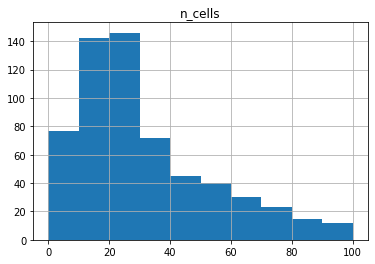

In [135]:
new_df.hist(range=[0, 100])

In [0]:
path = Path('/content/ds')
reg_data = ImageList.from_df(new_df,path,cols=['path_masks'], convert_mode = 'L').split_by_rand_pct(0.2, seed=42).label_from_df(label_cls=FloatList, cols = ['n_cells']).transform(size=64).databunch(bs=64*2) 

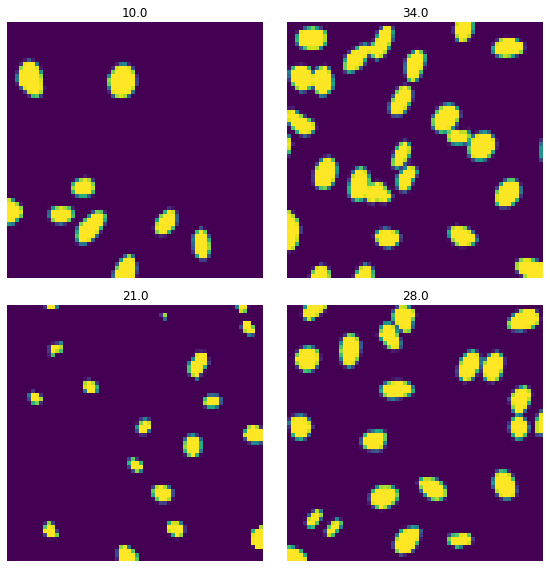

In [90]:
reg_data.show_batch(2, figsize=(8,8))

In [94]:
opt_func = partial(optim.Adam, betas=(0.9,0.99), eps=1e-5);opt_func

functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99), eps=1e-05)

In [0]:
def resnet(pretrained=False):
    pretrained = 'imagenet' if pretrained else None
    model = pretrainedmodels.resnet34(pretrained=pretrained)
    return model

In [0]:
class L1LossFlat(nn.SmoothL1Loss):
    def forward(self, input:Tensor, target:Tensor) -> Rank0Tensor:
        return super().forward(input.view(-1), target.view(-1))

In [0]:
class AgeModel(nn.Module):
    def __init__(self):
        super().__init__()
        layers = list(models.resnet34(pretrained=True).children())[:-2]
        layers[0] = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        layers += [AdaptiveConcatPool2d(), Flatten()]
        #layers += [nn.BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)]
        #layers += [nn.Dropout(p=0.60)]
        #layers += [nn.Linear(4096, 1024, bias=True), nn.ReLU(inplace=True)]
        #layers += [nn.BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)]
        #layers += [nn.Dropout(p=0.60)]
        #layers += [nn.Linear(2048, 1024, bias=True), nn.ReLU(inplace=True)]
        #layers += [nn.BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)]
        #layers += [nn.Dropout(p=0.75)]
        #layers += [nn.Linear(1024, 256, bias=True), nn.ReLU(inplace=True)]
        #layers += [nn.BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)]
        #layers += [nn.Dropout(p=0.50)]
        #layers += [nn.Linear(512,256 , bias=True), nn.ReLU(inplace=True)]
        layers += [nn.BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)]
        layers += [nn.Dropout(p=0.50)]
        layers += [nn.Linear(1024, 512, bias=True), nn.ReLU(inplace=True)]
        layers += [nn.Dropout(p=0.50)]
        layers += [nn.BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)]
        layers += [nn.Linear(512, 16, bias=True), nn.ReLU(inplace=True)]
        layers += [nn.Linear(16,1)]
        self.agemodel = nn.Sequential(*layers)
    def forward(self, x):
        return self.agemodel(x).squeeze(-1)
          # could add 116*torch.sigmoid

In [0]:
model = AgeModel()

In [140]:
learn = Learner(reg_data, model, model_dir = "/temp/model/", opt_func=opt_func, bn_wd=False, metrics=root_mean_squared_error,
               callback_fns=[ShowGraph]).mixup(stack_y=False, alpha=0.2)

learn.loss_func = L1LossFlat()

TypeError: ignored

In [131]:
learn.split([model.agemodel[4],model.agemodel[6],model.agemodel[8]])

Learner(data=ImageDataBunch;

Train: LabelList (536 items)
x: ImageList
Image (1, 64, 64),Image (1, 64, 64),Image (1, 64, 64),Image (1, 64, 64),Image (1, 64, 64)
y: FloatList
133.0,5.0,21.0,11.0,39.0
Path: /content/ds;

Valid: LabelList (134 items)
x: ImageList
Image (1, 64, 64),Image (1, 64, 64),Image (1, 64, 64),Image (1, 64, 64),Image (1, 64, 64)
y: FloatList
20.0,25.0,73.0,61.0,10.0
Path: /content/ds;

Test: None, model=AgeModel(
  (agemodel): Sequential(
    (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu):

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-02
Min loss divided by 10: 6.31E-02


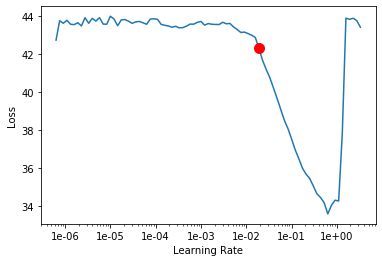

In [132]:
learn.freeze_to(-1)
learn.lr_find()
learn.recorder.plot(suggestion = True)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,29.549162,500436.250000,500461.000000,00:02
1,25.761068,143831.000000,143848.656250,00:02
2,24.180813,48696.285156,48706.144531,00:02
3,23.701237,13868.517578,13875.447266,00:02
4,23.463751,1814.455566,1854.120117,00:02
5,22.521912,462.426971,528.374207,00:02
6,21.361547,34.067852,46.283287,00:02
7,20.857065,39.953079,61.541599,00:02
8,20.421490,38.315346,59.960896,00:02
9,19.915533,442842.656250,442992.406250,00:02


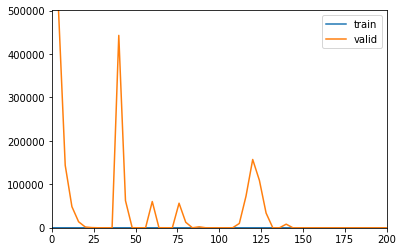

In [141]:
learn.fit_one_cycle(50,6.31E-01)

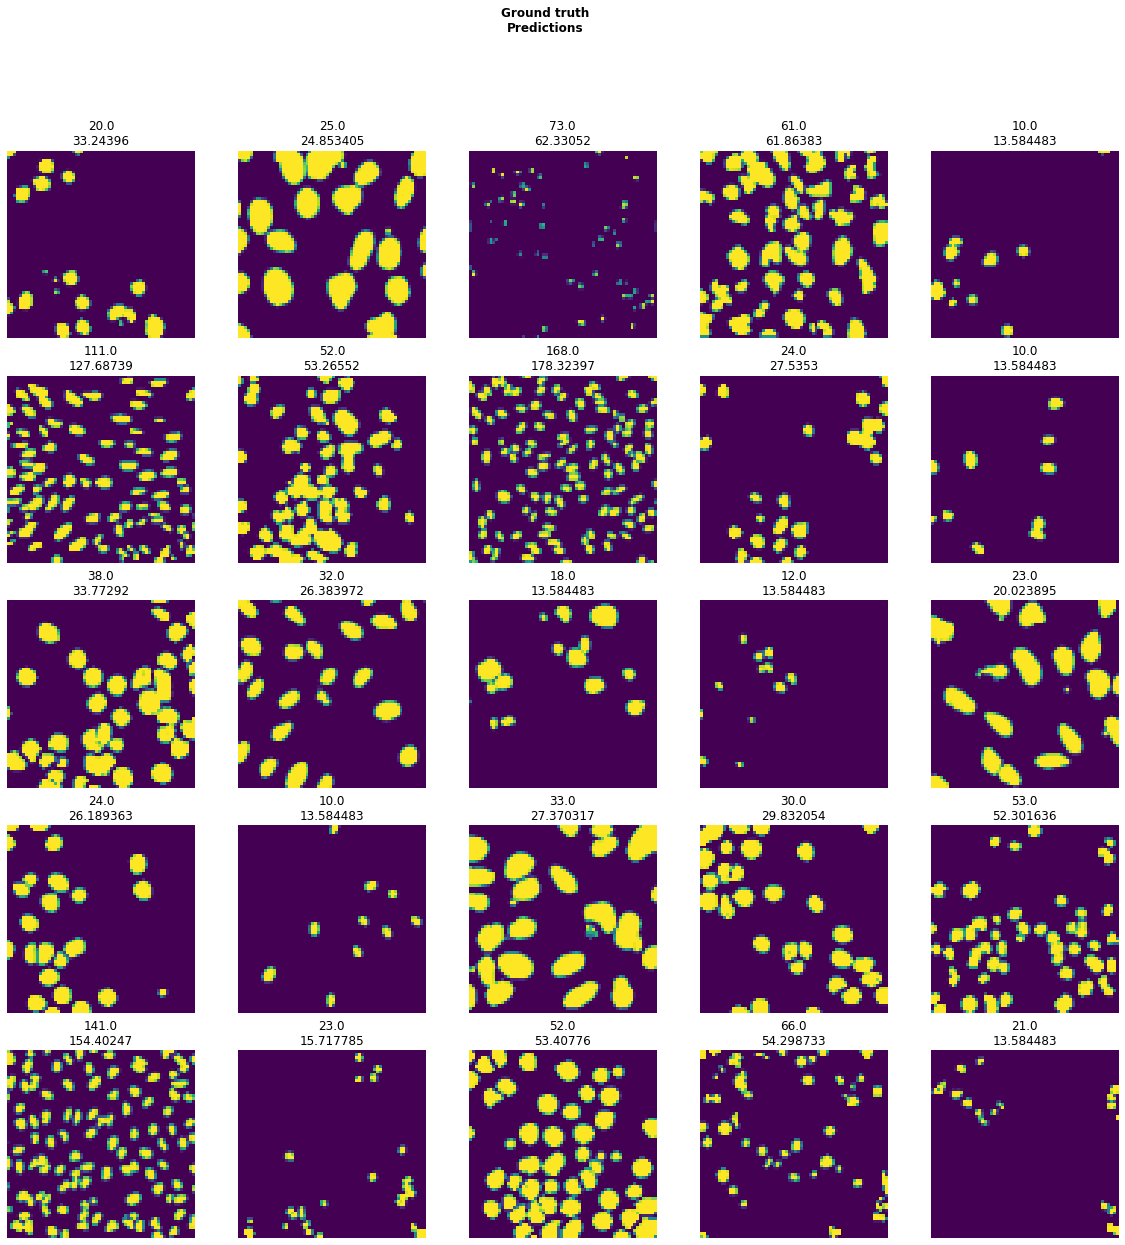

In [142]:
learn.show_results()

In [0]:
learn.save('learn1')

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,24.410004,70622416.000000,270323936.000000,00:03
1,24.704733,30401942.000000,127035960.000000,00:02
2,24.167276,20772620.000000,48644784.000000,00:02
3,23.428522,6874072.000000,31423084.000000,00:02
4,23.008018,13717893.000000,53496432.000000,00:02
5,22.146574,83524520.000000,254662352.000000,00:02
6,21.231577,206538432.000000,523276096.000000,00:02
7,20.133316,62933132.000000,226309968.000000,00:02
8,19.214365,31282572.000000,93225592.000000,00:02
9,18.530457,18173328.000000,55927980.000000,00:02


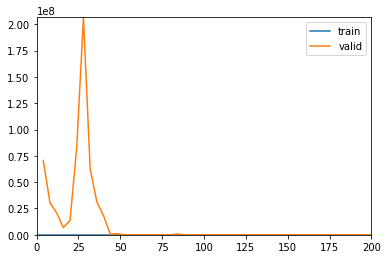

In [146]:
learn.fit_one_cycle(50,6.31E-02)

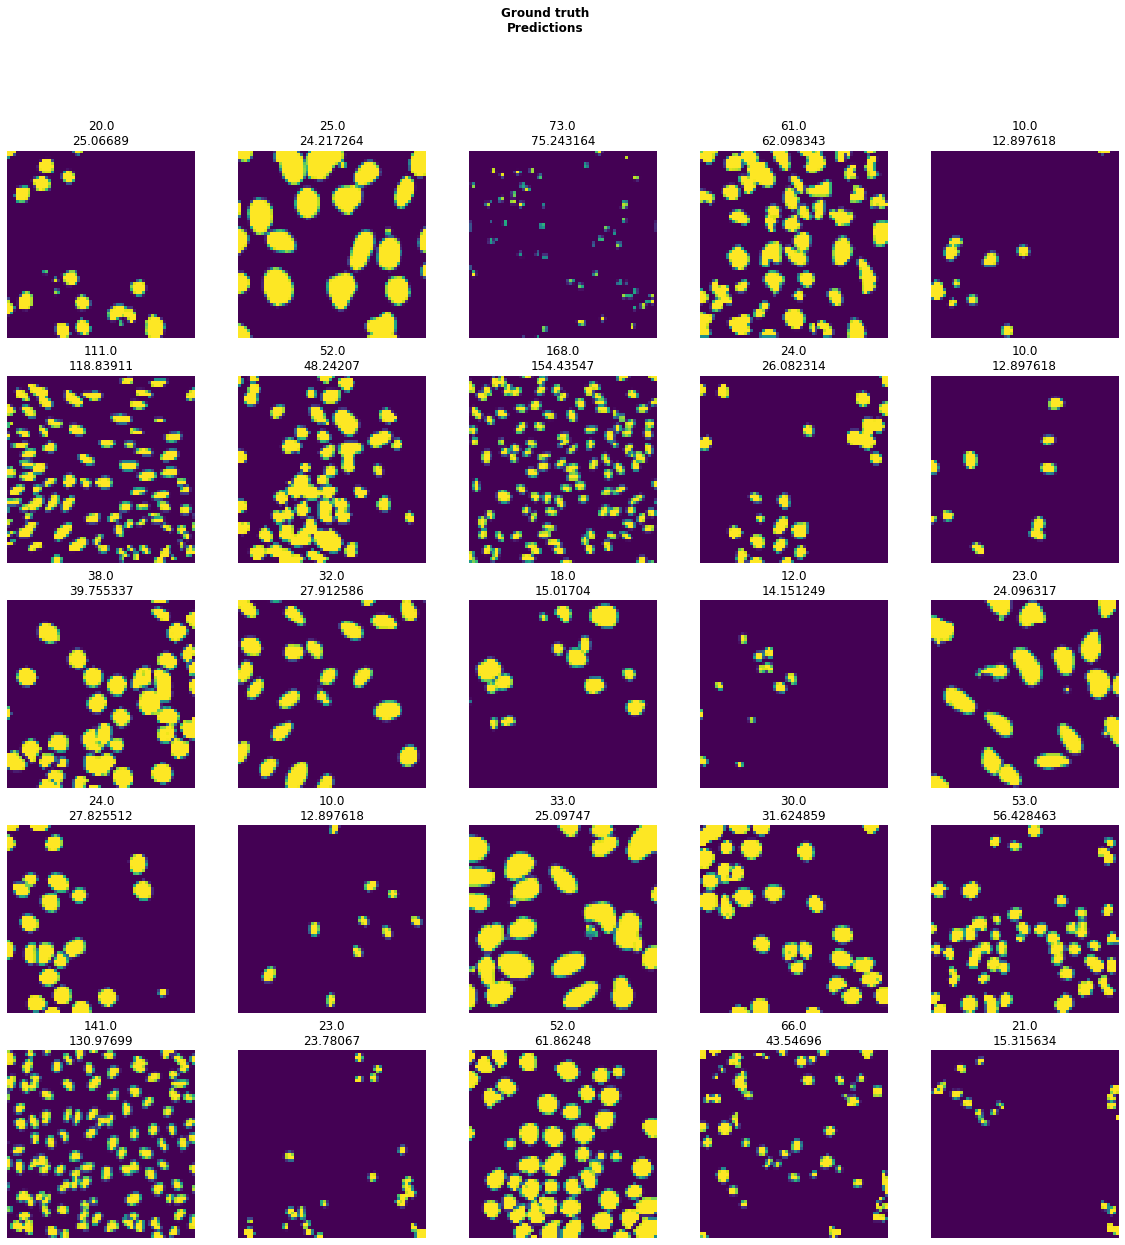

In [147]:
learn.show_results()